<a href="https://colab.research.google.com/github/DevBatra05/DeepLearningLab/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, unzip the dataset (update the path if your zip is stored in Drive)
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive (6).zip'  # change path if needed
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")
os.listdir(extract_path)


Mounted at /content/drive
✅ Dataset extracted successfully!


['Combined Dataset']

In [2]:
import os
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define base paths
base_dir = '/content/dataset/Combined Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Check the structure
print("Train subfolders:", os.listdir(train_dir))
print("Test subfolders:", os.listdir(test_dir))


Train subfolders: ['Moderate Impairment', 'No Impairment', 'Mild Impairment', 'Very Mild Impairment']
Test subfolders: ['Moderate Impairment', 'No Impairment', 'Mild Impairment', 'Very Mild Impairment']


In [3]:
# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    rotation_range=20,       # random rotation
    width_shift_range=0.2,   # horizontal shift
    height_shift_range=0.2,  # vertical shift
    shear_range=0.2,         # shear transformation
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # flip images
    fill_mode='nearest'      # fill missing pixels after transformation
)

# For testing, we only rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'   # since we have 4 classes
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Check the class indices
print("Class indices:", train_generator.class_indices)


Found 10240 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Class indices: {'Mild Impairment': 0, 'Moderate Impairment': 1, 'No Impairment': 2, 'Very Mild Impairment': 3}


In [4]:
model = models.Sequential([
    # 1st Convolution Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    # 2nd Convolution Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # 3rd Convolution Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of model
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks to stop early if validation accuracy stops improving
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # you can increase later (e.g., 15–20)
    validation_data=test_generator,
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1420s 4s/step - accuracy: 0.2704 - loss: 1.4220 - val_accuracy: 0.5004 - val_loss: 1.1651
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1421s 4s/step - accuracy: 0.4011 - loss: 1.2465 - val_accuracy: 0.5027 - val_loss: 1.0638
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1404s 4s/step - accuracy: 0.6199 - loss: 0.8289 - val_accuracy: 0.5004 - val_loss: 1.2249
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1409s 4s/step - accuracy: 0.6631 - loss: 0.7265 - val_accuracy: 0.5270 - val_loss: 1.0588
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1397s 4s/step - accuracy: 0.6943 - loss: 0.6502 - val_accuracy: 0.5301 - val_loss: 0.9544
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1371s 4s/step - accuracy: 0.7156 - loss: 0.6206 - val_accuracy: 0.5324 - val_loss: 0.9418
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1464s 4s/step - accuracy: 0.7116 - loss: 0.6055 - val_accuracy: 0.5395 - val_loss: 0.9313
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1437s 4s/step - accuracy: 0.7243 - loss: 0.6018 - 

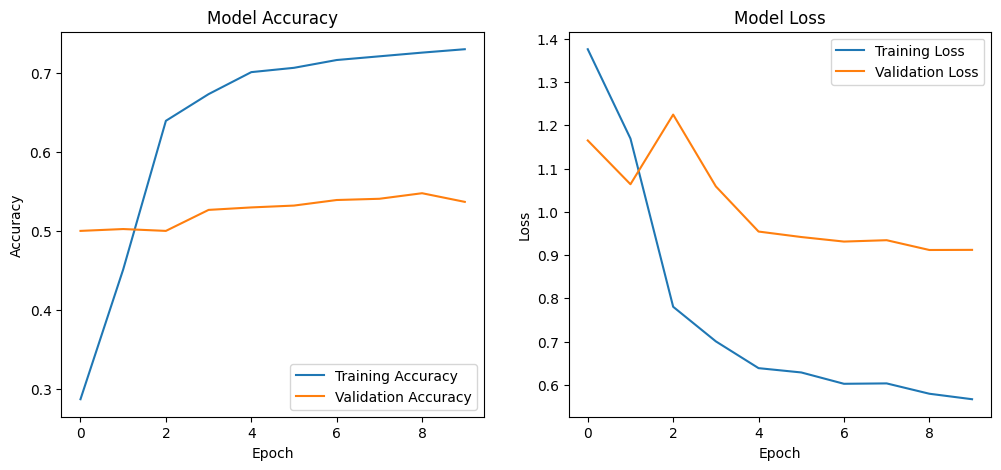

In [7]:
# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
# Load best model (highest validation accuracy)
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4640 - loss: 1.0462
✅ Test Accuracy: 54.81%
✅ Test Loss: 0.9118


Saving WhatsApp Image 2025-10-13 at 20.48.13_cddf3f49.jpg to WhatsApp Image 2025-10-13 at 20.48.13_cddf3f49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


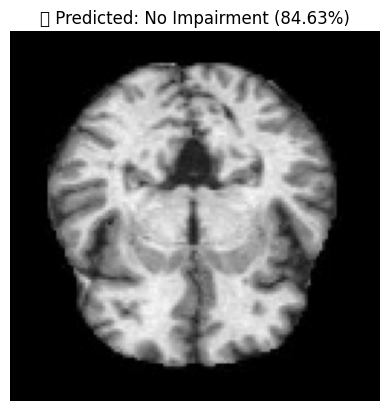

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define class names (same order as training)
class_labels = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

# Upload an MRI image from your local system
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class
    predictions = best_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0]) * 100

    # Display the result
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"🧠 Predicted: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()


In [10]:
# Save the trained model permanently to Drive
save_path = '/content/drive/MyDrive/Alzheimer_Model.keras'  # you can rename as you like
best_model.save(save_path)

print(f"✅ Model saved to Drive at: {save_path}")


✅ Model saved to Drive at: /content/drive/MyDrive/Alzheimer_Model.keras
